This dataset is a reaction optimization HTE dataset for a C-H arylation reaction with the objectives to maximize yield and minimize the cost of the reaction

To gain insights into the dataset, the distribution of the different objectives was analyzed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import colorsys

# Doyle colors
doyle_colors = ["#CE4C6F", "#1561C2", "#188F9D","#C4ADA2","#515798", "#CB7D85", "#A9A9A9"]
# extension of palette with lighter and darker versions
def adjust_lightness(color, factor=1.2):
    """
    Function to make colors lighter (factor > 1) or darker (factor < 1).
    """
    r, g, b = mcolors.to_rgb(color)
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    l = max(0, min(1, l * factor))
    r, g, b = colorsys.hls_to_rgb(h, l, s)
    return mcolors.to_hex((r, g, b))

lighter = [adjust_lightness(c, 1.2) for c in doyle_colors]
darker  = [adjust_lightness(c, 0.7) for c in doyle_colors]
all_colors = doyle_colors + darker[::-1] + lighter[::-1] 

# Save the categorical colormap
cat_cmap = ListedColormap(all_colors, name="Doyle_cat")
plt.colormaps.register(cat_cmap)

# Define and save a continuous colormap
colors = [doyle_colors[1],"#FFFFFFD1",doyle_colors[0]]
cont_cmap = LinearSegmentedColormap.from_list("Doyle_cont", colors)
plt.colormaps.register(cont_cmap)

# General plt parameters
plt.rcParams.update({
    "axes.titlesize": 20,        # Subplot title
    "axes.labelsize": 16,        # X and Y labels
    "figure.titlesize": 24,      # Suptitle
    "xtick.labelsize": 14,       # X tick labels
    "ytick.labelsize": 14,       # Y tick labels
    "legend.fontsize": 14,       # Legend text
    "legend.title_fontsize": 14  # Legend titles
})

In [2]:
# Read in the dataset.
df_data = pd.read_csv("arylation_labelled_data.csv",index_col=0,header=0)
df_data.rename(columns={"yield":"Yield","cost":"Cost"},inplace=True)
df_data

,concentration,temperature,Yield,Cost,base_number_of_atoms,base_dipole,base_homo_energy,base_ES_root_molar_volume,base_ES1_osc_strength,base_ES3_osc_strength,...,solvent_ES2_osc_strength,solvent_ES6_osc_strength,solvent_ES7_osc_strength,solvent_ES10_osc_strength,solvent_c_min_atom=O,solvent_c_min_APT_charge,solvent_c_min_ES_root_Mulliken_charge,solvent_c_min+1_atom=N,solvent_c_min+1_NPA_charge,solvent_c_max-1_NPA_Rydberg
new_index,,,,,,,,,,,,,,,,,,,,,
0,0.100,105,5.47,0.145775,8,7.1686,-0.19743,606.138,0.0031,0.1037,...,0.2223,0.0073,0.0005,0.0003,1,-0.777915,-0.338968,1,-0.47855,0.00223
96,0.100,90,5.22,0.145775,8,7.1686,-0.19743,606.138,0.0031,0.1037,...,0.2223,0.0073,0.0005,0.0003,1,-0.777915,-0.338968,1,-0.47855,0.00223
192,0.100,120,5.03,0.145774,8,7.1686,-0.19743,606.138,0.0031,0.1037,...,0.2223,0.0073,0.0005,0.0003,1,-0.777915,-0.338968,1,-0.47855,0.00223
288,0.057,90,3.60,0.155898,8,7.1686,-0.19743,606.138,0.0031,0.1037,...,0.2223,0.0073,0.0005,0.0003,1,-0.777915,-0.338968,1,-0.47855,0.00223
384,0.057,105,2.41,0.155894,8,7.1686,-0.19743,606.138,0.0031,0.1037,...,0.2223,0.0073,0.0005,0.0003,1,-0.777915,-0.338968,1,-0.47855,0.00223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1343,0.057,105,0.00,0.129075,17,11.0112,-0.17387,1218.030,0.0031,0.0000,...,0.0838,0.0034,0.0000,0.0000,0,0.099551,-0.530333,0,-0.68665,0.00089
1439,0.057,120,0.00,0.129075,17,11.0112,-0.17387,1218.030,0.0031,0.0000,...,0.0838,0.0034,0.0000,0.0000,0,0.099551,-0.530333,0,-0.68665,0.00089
1535,0.153,90,0.00,0.111903,17,11.0112,-0.17387,1218.030,0.0031,0.0000,...,0.0838,0.0034,0.0000,0.0000,0,0.099551,-0.530333,0,-0.68665,0.00089


Yield distribution

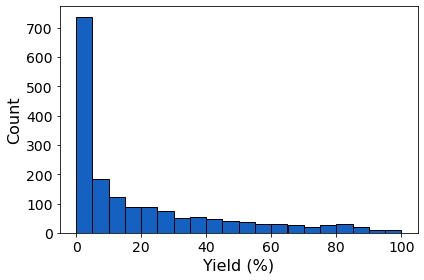

Mean yield: 19.375
Median yield: 8.05
Highest yield: 100.0
Lowest yield: 0.0
Fraction below 5% yield: 42.6%
Fraction below 20% yield: 65.6%


In [3]:
plt.figure(figsize=(6, 4))
plt.hist(df_data["Yield"], color=all_colors[1], bins=20, edgecolor="k")
plt.xlabel("Yield (%)")
plt.ylabel("Count")
plt.tick_params(axis='both', which='major')
plt.tight_layout()
plt.show()

print(f'Mean yield: {round(df_data["Yield"].mean(),3)}')
print(f'Median yield: {round(df_data["Yield"].median(),3)}')
print(f'Highest yield: {df_data["Yield"].max()}')
print(f'Lowest yield: {df_data["Yield"].min()}')
print(f'Fraction below 5% yield: {round(len(df_data[df_data["Yield"] < 5])/len(df_data)*100,1)}%')
print(f'Fraction below 20% yield: {round(len(df_data[df_data["Yield"] < 20])/len(df_data)*100,1)}%')

The dataset is heavily skewed towards low yields

Cost distribution

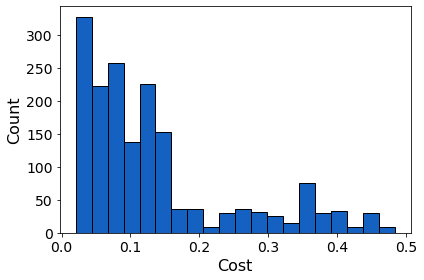

Mean cost: 0.1350685681087963
Median cost: 0.09835223900000001
Highest cost: 0.483154791
Lowest cost: 0.0206588


In [4]:
plt.figure(figsize=(6, 4))
plt.hist(df_data["Cost"], color=all_colors[1], bins=20, edgecolor="k")
plt.xlabel("Cost")
plt.ylabel("Count")
plt.tick_params(axis='both', which='major')
plt.tight_layout()
plt.show()

print(f'Mean cost: {df_data["Cost"].mean()}')
print(f'Median cost: {df_data["Cost"].median()}')
print(f'Highest cost: {df_data["Cost"].max()}')
print(f'Lowest cost: {df_data["Cost"].min()}')

The data is heavily skewed towards low cost which are good values as this is a minimization objective.

Two dimensional view (using normalized data based on the extreme values of the two objectives)

In [5]:
# scale the objectives
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_data[["Cost","Yield"]].to_numpy()),index=df_data.index,columns=["Cost","Yield"])
df_scaled["Cost_inverted"] = df_scaled["Cost"].apply(lambda x: 1-x) # invert because it is a minimization problem

df_scaled["objective_score"] = (df_scaled["Cost_inverted"] + df_scaled["Yield"])/2

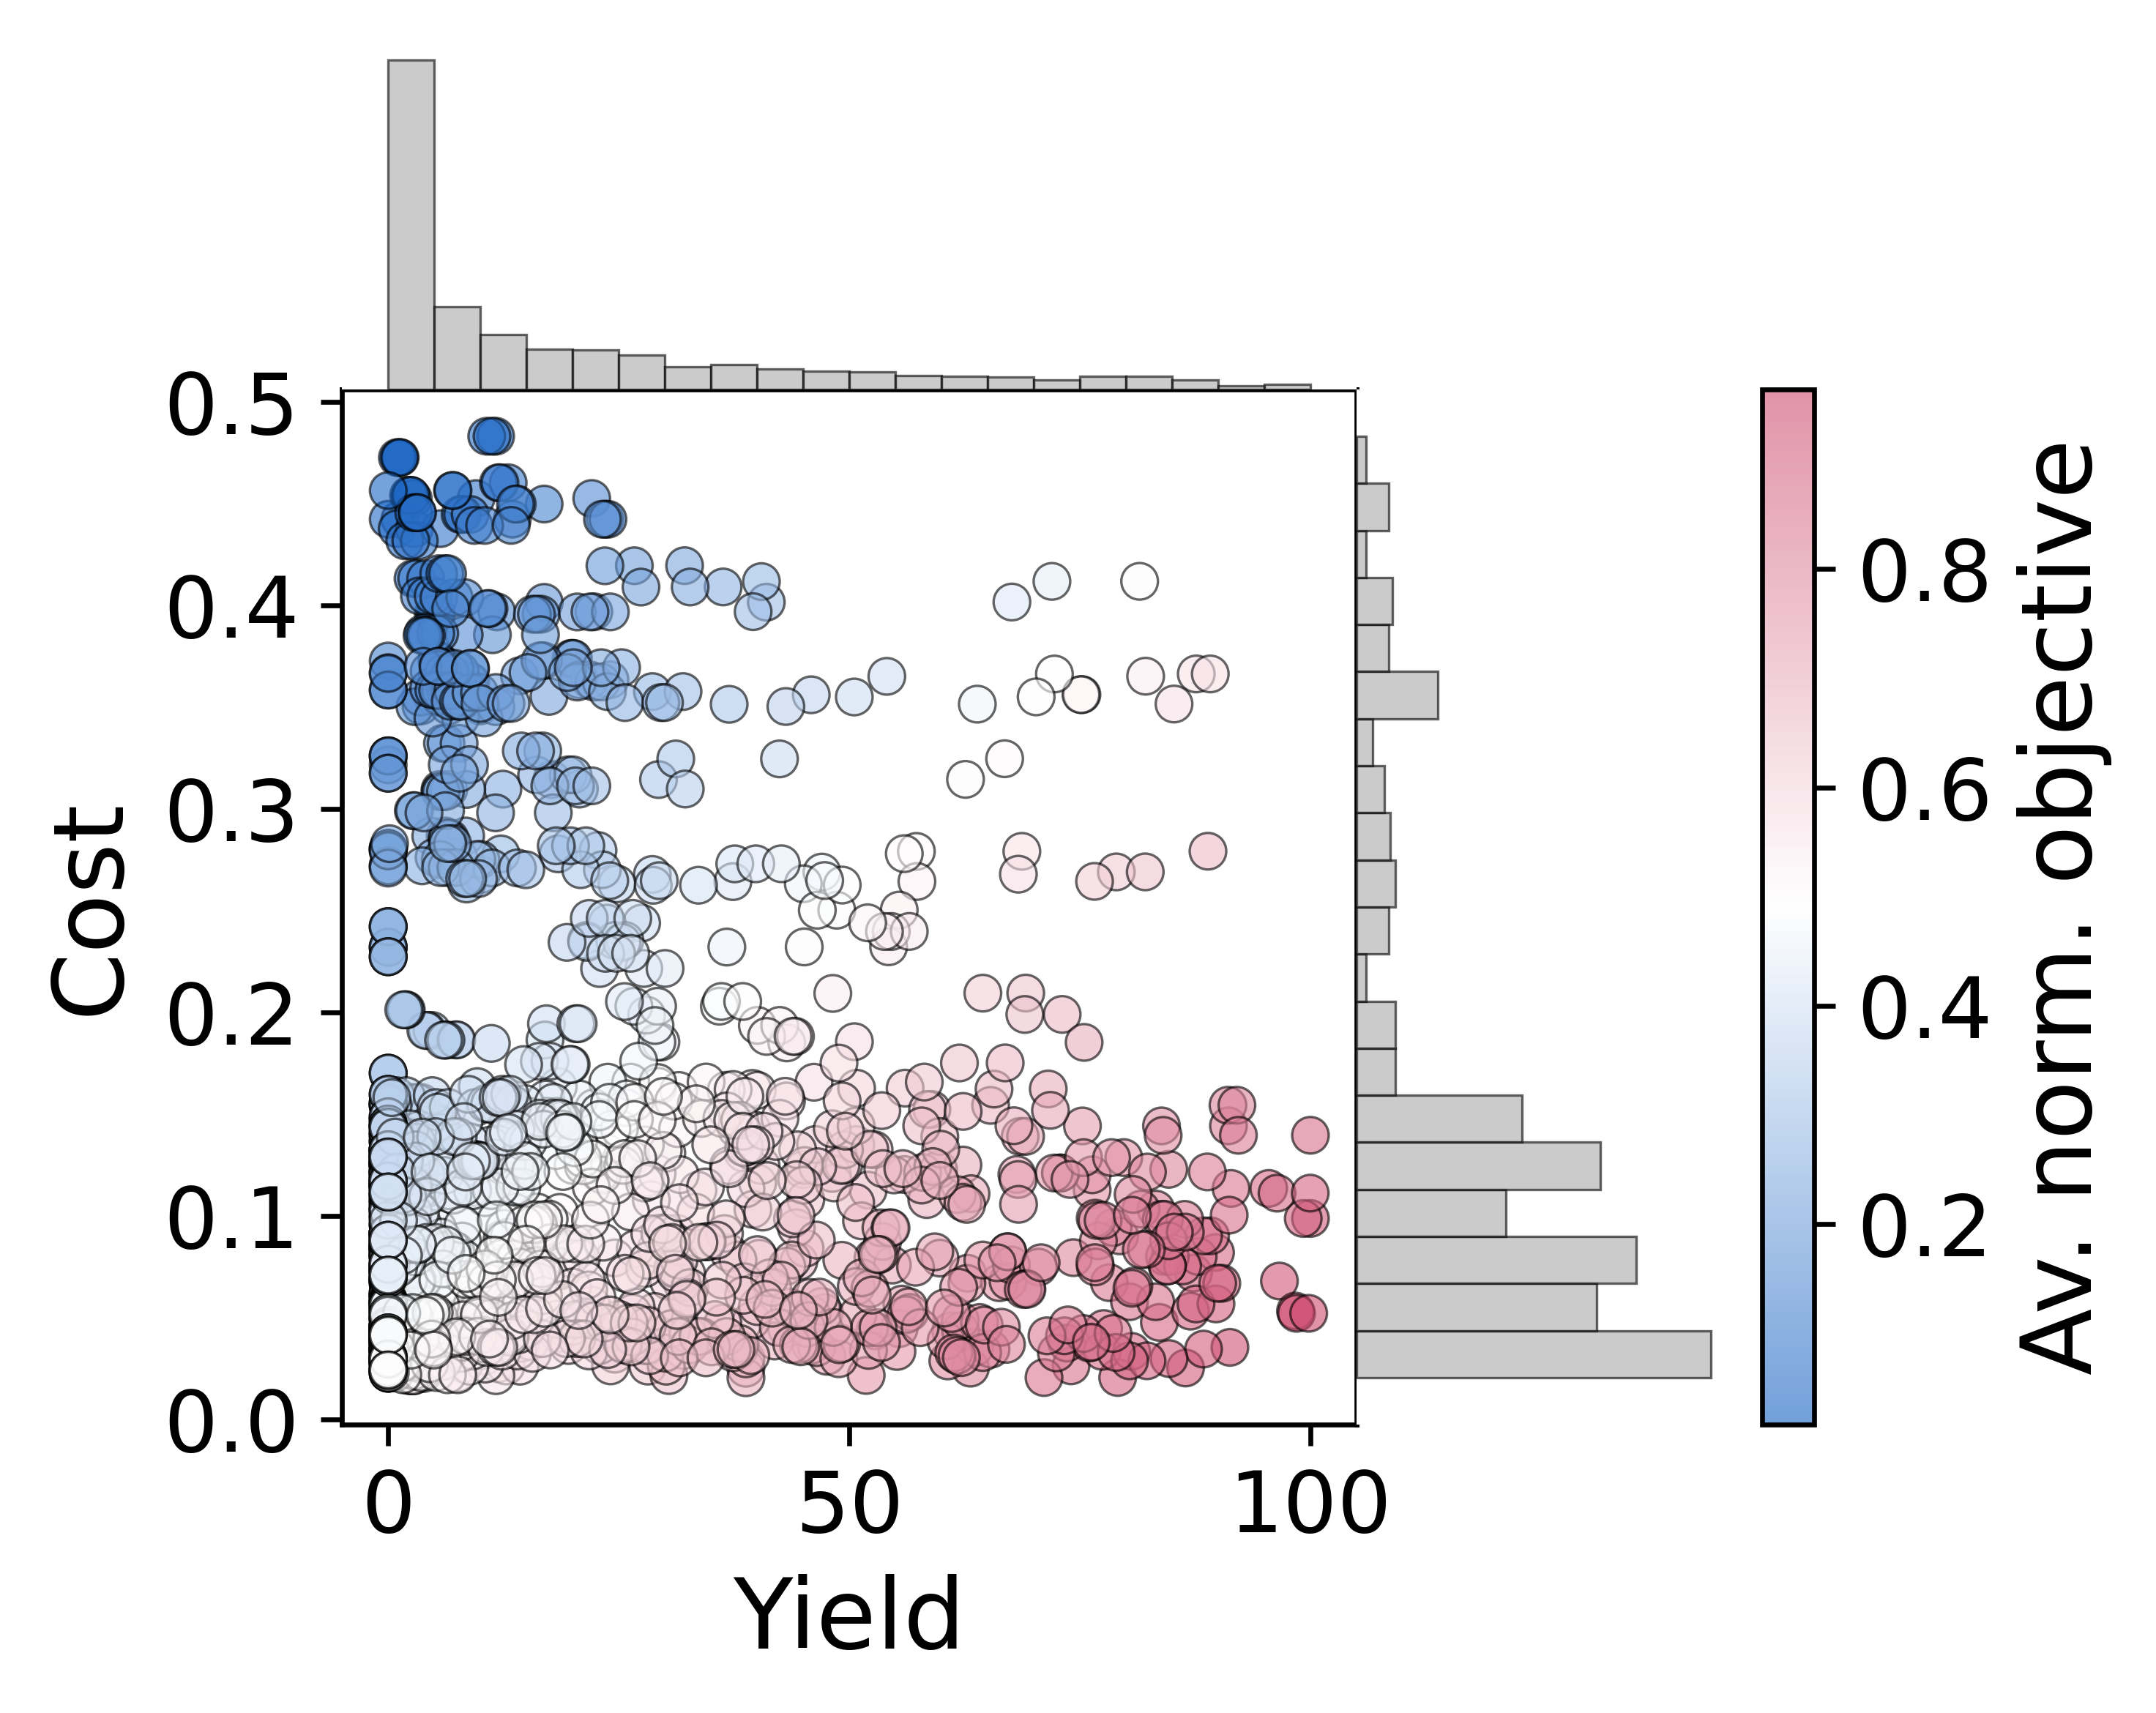

In [6]:
# Extract variables
x = df_data["Yield"]
y = df_data["Cost"]
c = df_scaled["objective_score"]

# --- Create a figure with custom layout ---
fig = plt.figure(figsize=(5, 4), dpi=600)
gs = gridspec.GridSpec(
    2, 2,
    width_ratios=[3, 2],
    height_ratios=[1, 3],
    wspace=0.0,
    hspace=0.0
)

# Main scatter plot
ax_scatter = fig.add_subplot(gs[1, 0])
sc = ax_scatter.scatter(
    x, y,
    c=c,
    cmap="Doyle_cont",
    alpha=0.6,
    edgecolor="k",
    linewidth=0.4
)

# Marginal histograms
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax_scatter)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax_scatter)

ax_histx.hist(x, bins=20, color=all_colors[6], edgecolor="k", linewidth=0.4, alpha=0.6)
ax_histy.hist(y, bins=20, color=all_colors[6], edgecolor="k", linewidth=0.4, alpha=0.6, orientation="horizontal")

# --- Remove ticks and labels from marginals ---
ax_histx.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
ax_histy.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)

# --- Labels and colorbar ---
ax_scatter.set_xlabel("Yield")
ax_scatter.set_ylabel("Cost")

cbar = fig.colorbar(sc, ax=ax_histy, fraction=0.4, pad=0.05)
cbar.set_label("Av. norm. objective")

for spine in ["top", "right","left","bottom"]:
    ax_histx.spines[spine].set_visible(False)
    ax_histy.spines[spine].set_visible(False)




plt.tight_layout()
plt.show()


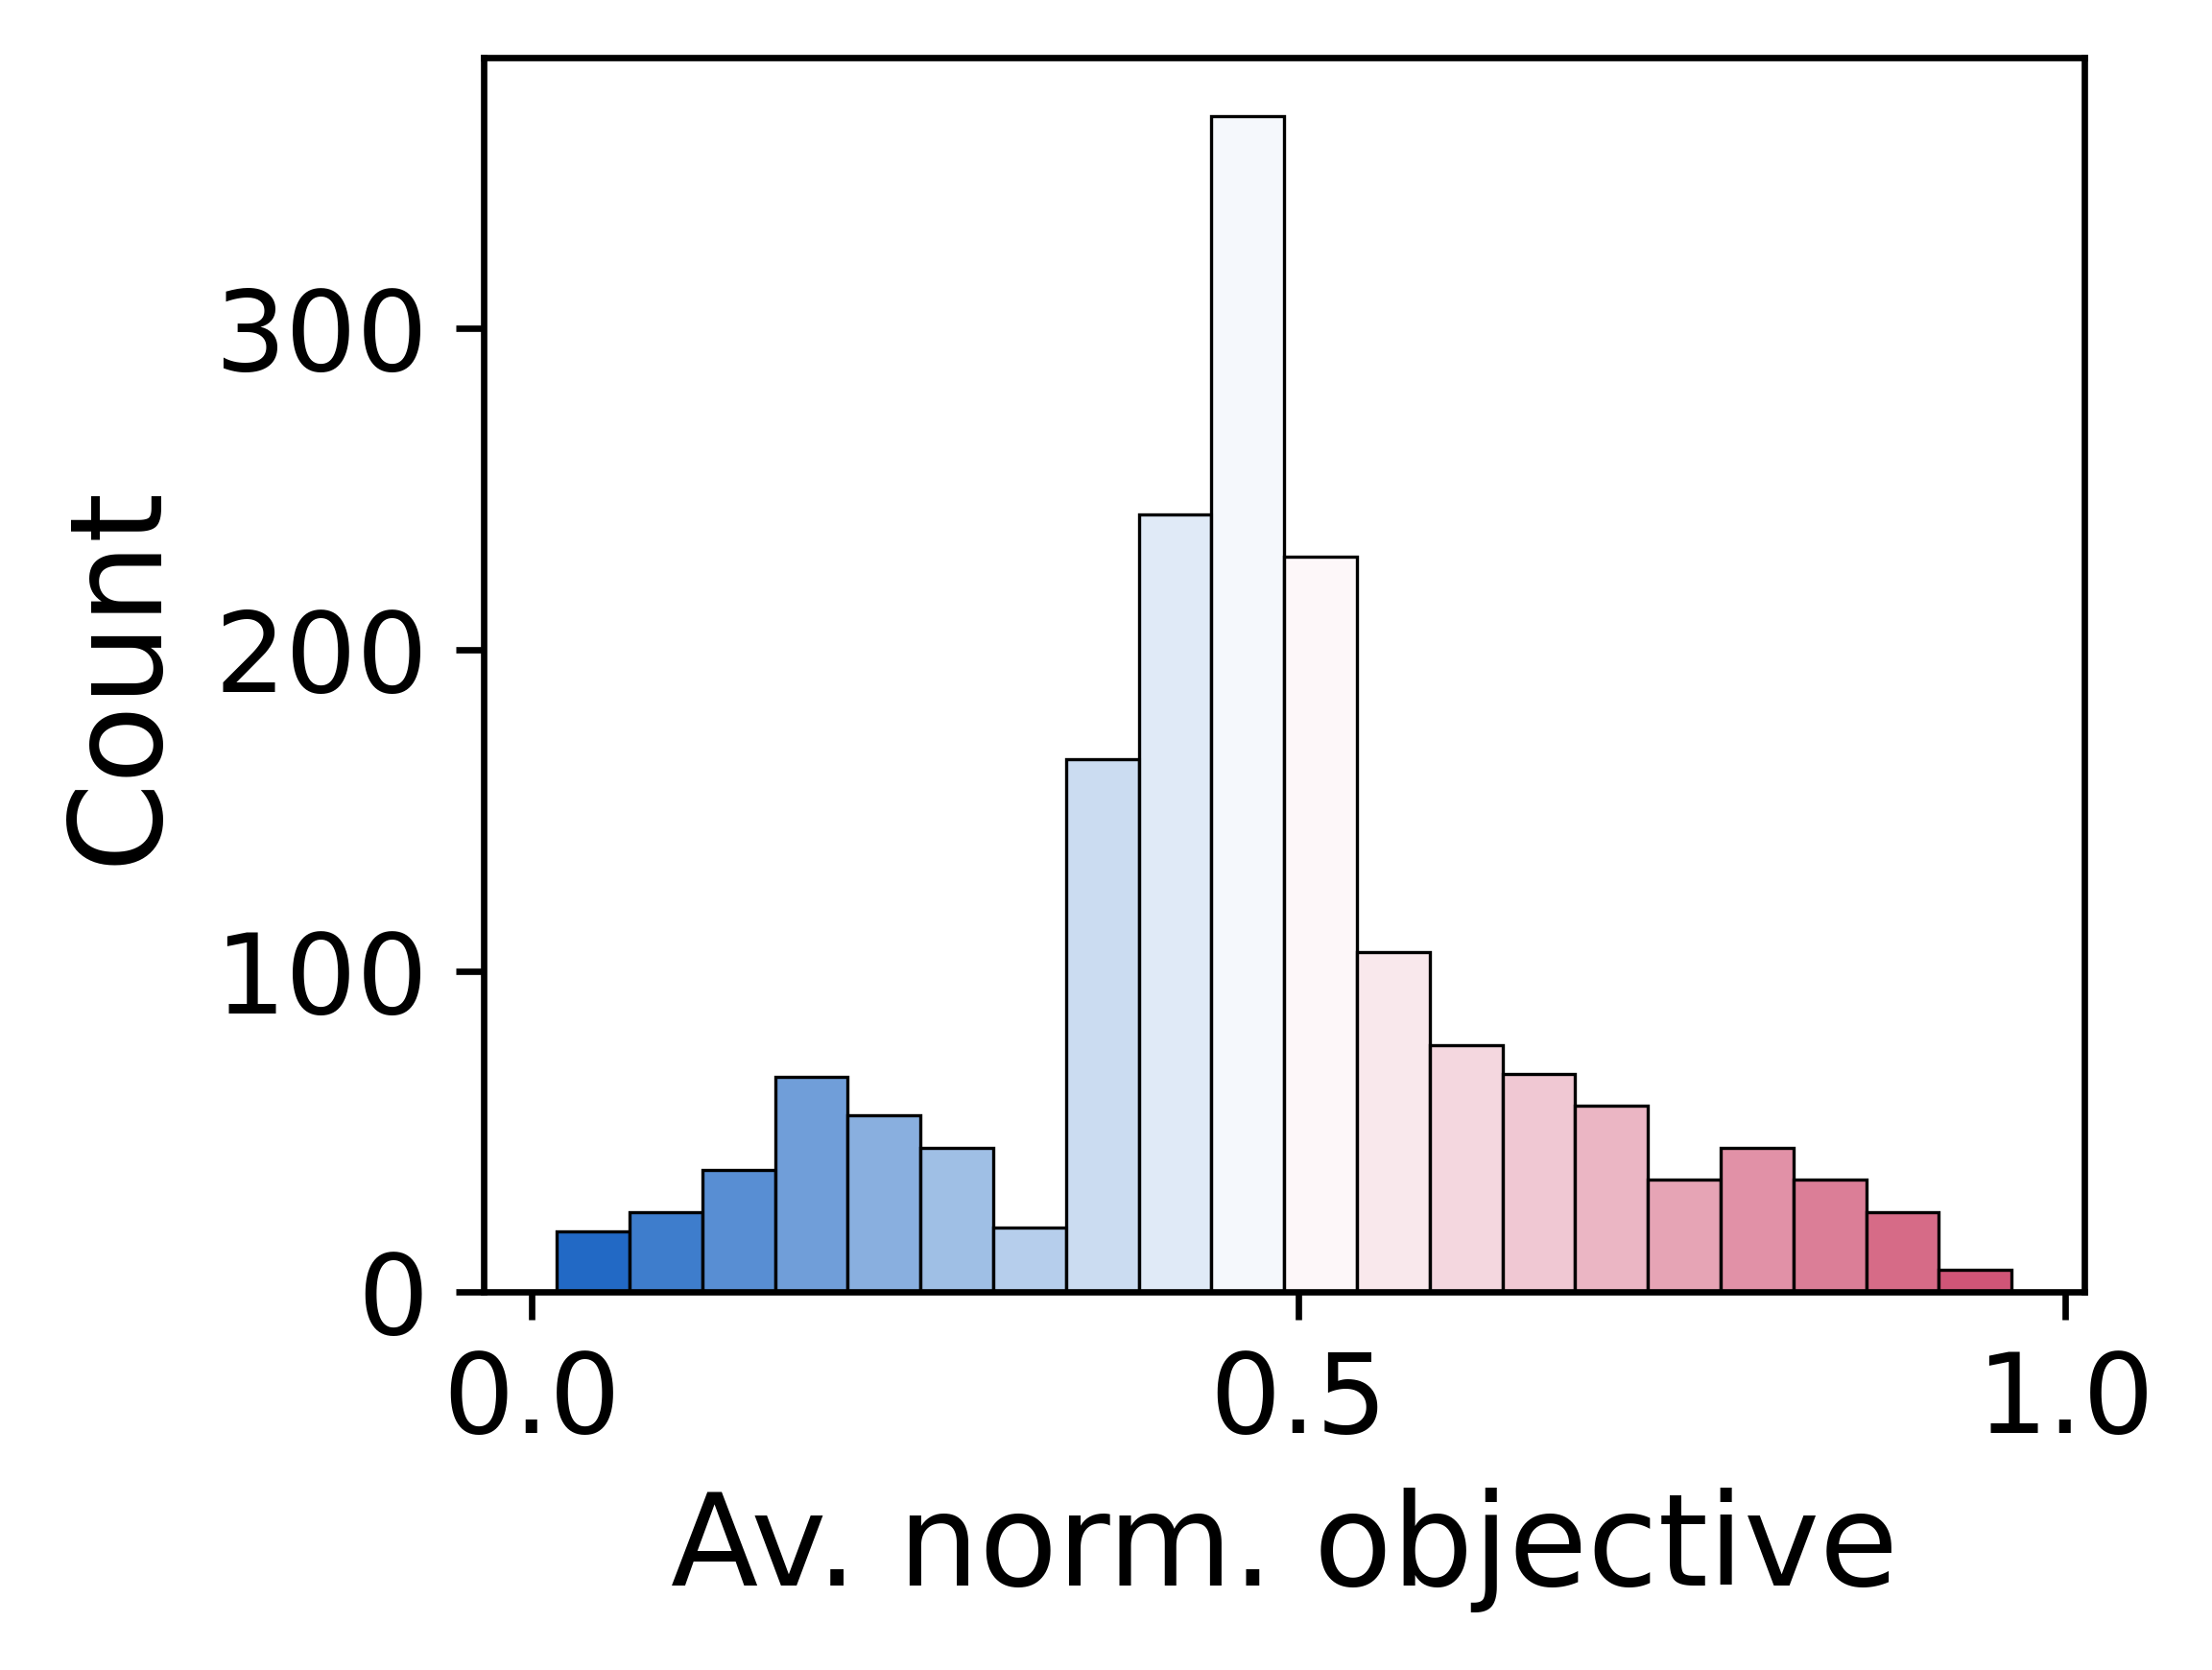

Mean objective_score: 0.473
Highest objective_score: 0.965
Lowest objective_score: 0.016


In [7]:
plt.figure(figsize=(4, 3), dpi=600)

# Compute histogram data first
data = df_scaled["objective_score"].dropna()
counts, bins = np.histogram(data, bins=20)

# Compute bin centers for coloring
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# Map bin centers to colors using vlag colormap
cmap = plt.cm.get_cmap("Doyle_cont")
norm = plt.Normalize(vmin=data.min(), vmax=data.max())
colors = cmap(norm(bin_centers))

# Draw colored bars manually
plt.bar(
    bin_centers,
    counts,
    width=(bins[1] - bins[0]),
    color=colors,
    edgecolor='k',
    linewidth=0.4
)

# Add labels
plt.xlabel("Av. norm. objective")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

print(f'Mean objective_score: {round(df_scaled["objective_score"].mean(),3)}')
print(f'Highest objective_score: {round(df_scaled["objective_score"].max(),3)}')
print(f'Lowest objective_score: {round(df_scaled["objective_score"].min(),3)}')

Most samples are low in yield (poor performance) and low in cost (high performance), giving an overall distribution in which most samples have a mediocre objective score.

In [9]:
print(f"All {len(df_data.columns)} Features in the dataset:")
df_data.columns.to_list()

All 532 Features in the dataset:


['concentration',
 'temperature',
 'Yield',
 'Cost',
 'base_number_of_atoms',
 'base_dipole',
 'base_homo_energy',
 'base_ES_root_molar_volume',
 'base_ES1_osc_strength',
 'base_ES3_osc_strength',
 'base_ES4_osc_strength',
 'base_ES6_osc_strength',
 'base_ES9_osc_strength',
 'base_atom1_Mulliken_charge',
 'base_atom1_NMR_anisotropy',
 'base_c_min_NPA_charge',
 'base_c_min+1_ES_root_Mulliken_charge',
 'base_vib_3_correlation',
 'ligand_number_of_atoms_MING',
 'ligand_dipole_MING',
 'ligand_dipole_MAXG',
 'ligand_dipole_STDEV',
 'ligand_molar_mass_MING',
 'ligand_molar_volume_MING',
 'ligand_molar_volume_STDEV',
 'ligand_electronic_spatial_extent_STDEV',
 'ligand_homo_energy_MING',
 'ligand_homo_energy_MAXG',
 'ligand_homo_energy_STDEV',
 'ligand_lumo_energy_MING',
 'ligand_lumo_energy_STDEV',
 'ligand_electronegativity_MING',
 'ligand_hardness_MING',
 'ligand_hardness_STDEV',
 'ligand_E_scf_STDEV',
 'ligand_zero_point_correction_STDEV',
 'ligand_G_thermal_correction_STDEV',
 'ligand_ES_